In [2]:
import sys
print(sys.executable)


C:\Users\Junaid\AppData\Local\Programs\Python\Python312\python.exe


In [2]:
import sys
print(sys.executable)


C:\Users\Junaid\AppData\Local\Programs\Python\Python312\python.exe


In [3]:
!python --version


Python 3.12.6


In [4]:
pip install ipykernel


Note: you may need to restart the kernel to use updated packages.


In [11]:
!pip install pandas sympy numpy matplotlib scipy CoolProp


In [7]:
!python --version


Python 3.12.6


In [2]:
import sympy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import CoolProp.CoolProp as CP



C:\Users\Junaid\AppData\Local\Temp\ipykernel_13416\1729736615.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
z = sp.Symbol('z')  # Column height
C_A = sp.Function('C_A')(z)  # Gas-phase concentration
C_B = sp.Symbol('C_B')  # Liquid-phase concentration (constant for simplicity)
K_La, v_g, C_Ai = sp.symbols('K_La v_g C_Ai')
# K_La: The overall mass transfer coefficient 
# v_g: The superficial gas velocity
# C_Ai: The interfacial concentration of CO₂ in the gas phase (units: 
# Differential equation
mass_transfer_eq = sp.Eq(C_A.diff(z), -K_La / v_g * (C_A - C_Ai))


In [4]:
# # Define the differential equation
# def packed_column_ode(C_A, z, K_La, v_g, C_Ai):
#     return -K_La / v_g * (C_A - C_Ai)

# # Function to get user inputs
# def get_float_input(prompt, default):
#     try:
#         return float(input(f"{prompt} (Default: {default}): ") or default)
#     except ValueError:
#         print("Invalid input, using default value.")
#         return default

# Define the differential equations
def gas_phase_ode(C_A, z, K_La, v_g, H, C_B0, L):
    # Calculate liquid-phase concentration (C_B) as a function of z
    C_B = C_B0 - (L / v_g) * (C_A0 - C_A)  # Liquid concentration profile
    C_Ai = H * C_B  # Interfacial concentration based on Henry's law
    return -K_La / v_g * (C_A - C_Ai)


In [5]:

# Function to get user inputs
def get_float_input(prompt, default):
    try:
        return float(input(f"{prompt} (Default: {default}): ") or default)
    except ValueError:
        print("Invalid input, using default value.")
        return default
# C_Ai = get_float_input("Interfacial concentration (C_Ai) [mol/m³]", 0.1)

In [9]:
# # Get user inputs
# print("Enter the parameters for the packed column model:")
# K_La = get_float_input("Overall mass transfer coefficient (K_La) [1/s]", 0.01)
# v_g = get_float_input("Gas velocity (v_g) [m/s]", 0.5)
# C_Ai = get_float_input("Interfacial concentration (C_Ai) [mol/m³]", 0.1)
# C_A0 = get_float_input("Initial gas concentration (C_A0) [mol/m³]", 1.0)
# z_min = get_float_input("Column height start (z_min) [m]", 0)
# z_max = get_float_input("Column height end (z_max) [m]", 10)
# num_points = int(get_float_input("Number of points for z_range", 100))

# Get user inputs
print("Enter the parameters for the packed column model:")
K_La = get_float_input("Overall mass transfer coefficient (K_La) [1/s]", 0.01)
v_g = get_float_input("Gas velocity (v_g) [m/s]", 0.5)
H = get_float_input("Henry's Law constant (H) [mol/m³Pa ]", 1.5)  # Example value
C_B0 = get_float_input("Initial liquid concentration (C_B0) [mol/m³]", 0.5)
L = get_float_input("Liquid velocity (L) [m/s]", 0.1)  # Liquid flow rate
C_A0 = get_float_input("Initial gas concentration (C_A0) [mol/m³]", 1.0)
z_min = get_float_input("Column height start (z_min) [m]", 0)
z_max = get_float_input("Column height end (z_max) [m]", 10)
num_points = int(get_float_input("Number of points for z_range", 100))


Enter the parameters for the packed column model:


Overall mass transfer coefficient (K_La) [1/s] (Default: 0.01):  2
Gas velocity (v_g) [m/s] (Default: 0.5):  0.1
Henry's Law constant (H) [mol/m³Pa ] (Default: 1.5):  0.00034
Initial liquid concentration (C_B0) [mol/m³] (Default: 0.5):  0.5
Liquid velocity (L) [m/s] (Default: 0.1):  0.1
Initial gas concentration (C_A0) [mol/m³] (Default: 1.0):  0.2
Column height start (z_min) [m] (Default: 0):  0
Column height end (z_max) [m] (Default: 10):  5
Number of points for z_range (Default: 100):  500


In [10]:
# # Solve the differential equation
# z_range = np.linspace(z_min, z_max, num_points)  # Column height range
# result = odeint(packed_column_ode, C_A0, z_range, args=(K_La, v_g, C_Ai))


# # Calculate CO₂ removal efficiency at each point
# efficiencies = ((C_A0 - result.flatten()) / C_A0) * 100


# # # Calculate CO₂ removal efficiency
# # C_A_out = result[-1, 0]  # CO₂ concentration at the outlet (z = z_max)
# # efficiency = ((C_A0 - C_A_out) / C_A0) * 100
# # efficiency = [efficiency] * len(z_range)

# Solve the differential equation
z_range = np.linspace(z_min, z_max, num_points)  # Column height range
result = odeint(gas_phase_ode, C_A0, z_range, args=(K_La, v_g, H, C_B0, L))

# Calculate interfacial concentration (C_Ai) and removal efficiency at each point
C_A_profile = result.flatten()
C_B_profile = C_B0 - (L / v_g) * (C_A0 - C_A_profile)  # Liquid-phase concentration
C_Ai_profile = H * C_B_profile  # Interfacial concentration
efficiencies = ((C_A0 - C_A_profile) / C_A0) * 100  # Removal efficiency


In [11]:
# # Display results
# print("\nResults: Column Height vs CO₂ Concentration")
# print(f"{'Height (z) [m]':<20} {'CO₂ Concentration (C_A) [mol/m³]':<30}")
# print("-" * 50)

# for z, C_A in zip(z_range, result.flatten()):
#     print(f"{z:<20.2f} {C_A:<30.4f}")

# print("\nCO₂ Removal Efficiency:")
# print(f"Initial Concentration (C_A0): {C_A0:.4f} mol/m³")
# print(f"Outlet Concentration (C_A_out): {C_A_out:.4f} mol/m³")
# print(f"Efficiency: {efficiency:.2f}%")

# # Display results
# print("\nResults: Column Height vs CO₂ Concentration and Efficiency")
# print(f"{'Height (z) [m]':<20} {'CO₂ Concentration (C_A) [mol/m³]':<30} {'Efficiency (%)':<20}")
# print("-" * 70)

# for z, C_A, eff in zip(z_range, result.flatten(), efficiency):
#     print(f"{z:<20.2f} {C_A:<30.4f} {eff:<20.2f}")
# # print(type(efficiency))

# Display results
print("\nResults: Column Height vs CO₂ Concentration and Efficiency")
print(f"{'Height (z) [m]':<20} {'CO₂ Concentration (C_A) [mol/m³]':<30} {'C_Ai (mol/m³)':<20} {'Efficiency (%)':<20}")
print("-" * 90)

for z, C_A, C_Ai, eff in zip(z_range, C_A_profile, C_Ai_profile, efficiencies):
    print(f"{z:<20.2f} {C_A:<30.4f} {C_Ai:<20.4f} {eff:<20.2f}")



Results: Column Height vs CO₂ Concentration and Efficiency
Height (z) [m]       CO₂ Concentration (C_A) [mol/m³] C_Ai (mol/m³)        Efficiency (%)      
------------------------------------------------------------------------------------------
0.00                 0.2000                         0.0002               0.00                
0.01                 0.1637                         0.0002               18.14               
0.02                 0.1340                         0.0001               33.00               
0.03                 0.1097                         0.0001               45.15               
0.04                 0.0898                         0.0001               55.10               
0.05                 0.0735                         0.0001               63.24               
0.06                 0.0602                         0.0001               69.90               
0.07                 0.0493                         0.0001               75.36               
0

In [12]:
# Plot the profiles
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

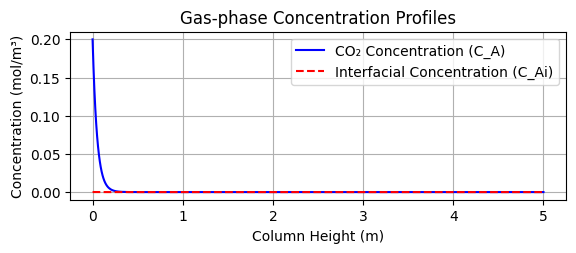

In [80]:
# CO₂ Concentration Profile
plt.subplot(2, 1, 1)
plt.plot(z_range, C_A_profile, label='CO₂ Concentration (C_A)', color='blue')
plt.plot(z_range, C_Ai_profile, label='Interfacial Concentration (C_Ai)', color='red', linestyle='dashed')
plt.xlabel('Column Height (m)')
plt.ylabel('Concentration (mol/m³)')
plt.title('Gas-phase Concentration Profiles')
plt.legend()
plt.grid()


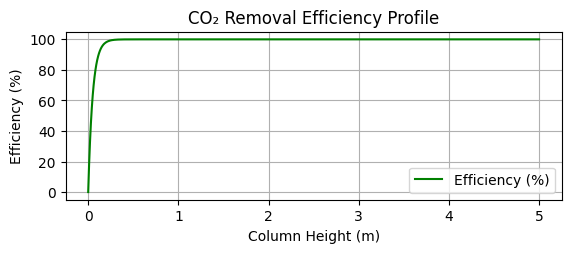

In [13]:
# Efficiency Profile
plt.subplot(2, 1, 2)
plt.plot(z_range, efficiencies, label='Efficiency (%)', color='green')
plt.xlabel('Column Height (m)')
plt.ylabel('Efficiency (%)')
plt.title('CO₂ Removal Efficiency Profile')
plt.legend()
plt.grid()

In [74]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>